# Avaliando o modelo criado

### Criando o modelo
- Nas últimas aulas, criamos o modelo abaixo

In [1]:
# Importando o pandas e a base
import pandas as pd
baseCompleta = pd.read_excel("BaseInadimplencia.xlsx",sheet_name='Base')
baseCompleta.head(2)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-1.992492,-4.158429,0


In [2]:
baseCompleta.shape

(1000, 3)

### Separando em treino e teste

In [3]:
from sklearn.model_selection import train_test_split
X = baseCompleta[['SaldoConta','SaldoInvestimento']]
y = baseCompleta['Situacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Executar o modelo que já estava criado

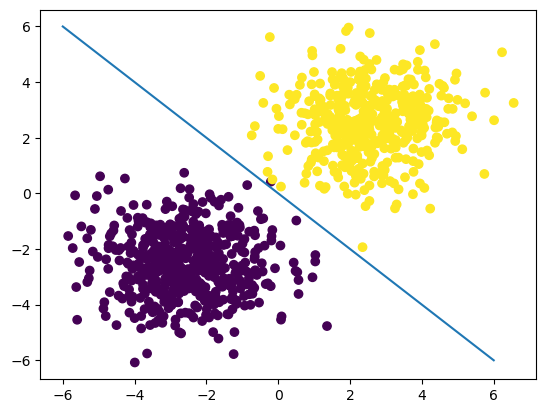

In [4]:
# Criando uma reta capaz de separar esses pontos
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(X_train.SaldoConta, X_train['SaldoInvestimento'],c=y_train)
ax.scatter(X_test.SaldoConta, X_test['SaldoInvestimento'],c=y_test)
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

plt.show()

**Essa reta que separa os dados é dada por y=-x e tudo que estiver acima da reta deve ser classificado como 1 e tudo que estiver abaixo da reta como 0**

In [24]:
# Transformando essa reta em uma função para classificar os pontos
def clf(x,y):
    # y_modelo = -x_modelo
    y_modelo = -x

    # Se y_modelo > y_dado -> class: 0
    if y_modelo >= y:
        return 0
    # Se y_modelo < y_dado -> class: 1
    elif y_modelo < y:
        return 1

In [28]:
# Aplicando a função aos dados de treino
y_pred_train = X_train.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)
y_pred_test = X_test.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)

In [30]:
# Verificando a base com a nova coluna
y_pred_train.head(5)

703    1
311    0
722    1
629    1
0      0
dtype: int64

In [31]:
y_pred_test.head(5)

521    0
737    1
740    1
660    1
411    0
dtype: int64

### Avaliando o modelo criado
- Para avaliar o modelo, vamos começar utilizando a matriz de confusão (confusion matrix)
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
# Matriz de confusão para a base de treino
confusion_matrix(y_train,y_pred_train)

array([[359,   1],
       [  0, 310]], dtype=int64)

In [34]:
# Matriz de confusão para a base de teste
confusion_matrix(y_test,y_pred_test)

array([[183,   0],
       [  0, 147]], dtype=int64)

- Vamos calcular a acurácia
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [35]:
from sklearn.metrics import accuracy_score
# Acurácia para a base de treino
accuracy_score(y_train,y_pred_train)

0.9985074626865672

In [36]:
# Acurácia para a base de teste
accuracy_score(y_test,y_pred_test)

1.0

- E então vamos utilizar a precisão
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [37]:
from sklearn.metrics import precision_score
# Precisão para a base de treino
precision_score(y_train,y_pred_train)

0.9967845659163987

In [38]:
# Precisão para a base de teste
precision_score(y_test,y_pred_test)

1.0

- E o recall
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

In [39]:
from sklearn.metrics import recall_score
# Recall para a base de treino
recall_score(y_train,y_pred_train)

1.0

In [40]:
# Recall para a base de teste
recall_score(y_test,y_pred_test)

1.0